In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import seaborn as sn
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data['Species'] = data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})
data

<ipython-input-5-cf6246a87557>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species'] = data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],data['Species'], test_size=0.3)

In [7]:
mymodel = linear_model.LogisticRegression(max_iter=120)
mymodel.fit(X_train, y_train)

LogisticRegression(max_iter=120)

In [8]:
mymodel.score(X_test, y_test)

0.9777777777777777

In [9]:
predicted_output = mymodel.predict(X_test)
predicted_output

array([1, 3, 1, 1, 3, 3, 3, 2, 1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 1, 2,
       2, 1, 3, 2, 3, 2, 3, 1, 1, 2, 3, 2, 2, 3, 3, 3, 1, 3, 2, 3, 1, 2,
       3])

In [10]:
cm = confusion_matrix(y_test, predicted_output)
cm

array([[18,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 15]])

Text(33.22222222222222, 0.5, 'Truth or Actual Value')

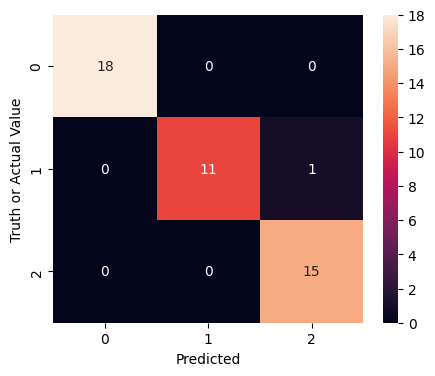

In [11]:
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth or Actual Value')